Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2751 - val_loss: 0.1903
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1714 - val_loss: 0.1538
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1446 - val_loss: 0.1342
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1287 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1182 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1110 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1057 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1018 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0992 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0953

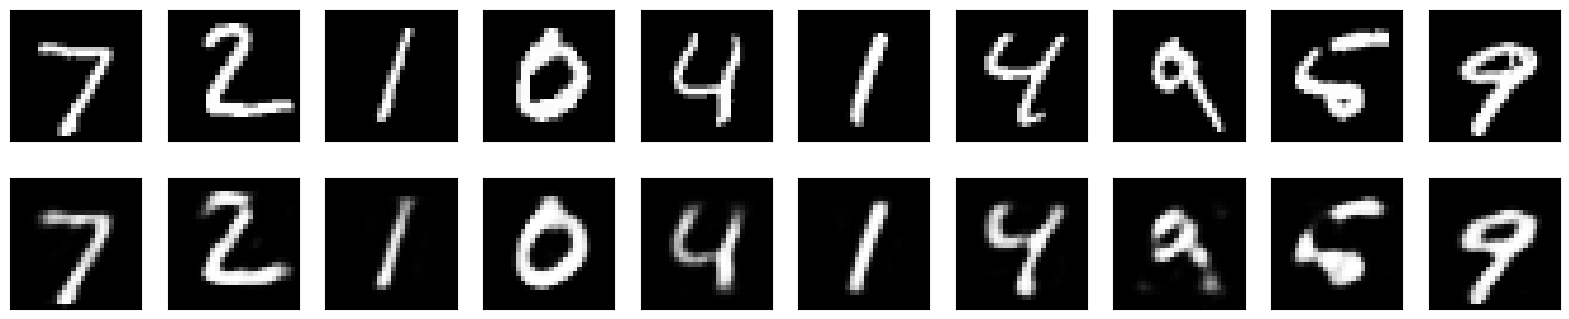

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist

(x_train,_),(x_test,_)=mnist.load_data()

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

input_img=Input(shape=(784,))
encode=Dense(32,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encode)

autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

encoded_imgs=autoencoder.predict(x_test)
decoded_imgs=encoded_imgs
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()